## Trabalho de Encerramento da Disciplina 
## BIG DATA, DATA ANALYTICS E FERRAMENTAS DE ANÁLISE DE DADOS IOT 
**Aluno:** Robson Aparecido Ferreira da Silva **RA:** 621200937 

**Universidade Nove de Julho - PÓS-GRADUAÇÃO "LATO SENSU" EM ESPECIALIZAÇÃO EM INTERNET DAS COISAS**

## Análise do DateSet obtido de um sensor de temperatura.
Os dados foram colhidos de um sensor durante o ano de 2018

### Colunas disponíveis no dataset e o que representa cada informação
* id : identificador único de cada sensor de leitura

* room_id/id : ambiente onde estava instalado o sensor (interno ou externo -> usado 'admin room' somente para exemplo.

* noted_date : data e hora da leitura

* temp : dados da temperatura

* out/in : se os dados vieram de um sensor instalado em ambiente interno ou externo

Na imagem abaixo podemos ver o efeito da temperatura ambiente no corpo humano e por meio dos dados obtidos através do sensor adequar o ambiente para que não haja efeitos negativos a saúde das pessoas.

![image info](assets/Effects-of-Heat-Index-in-our-Body-1-5-10-2021.png)

Abaixo faço a importação das bibliotecas necessárias, defino a localização do arquivo na variável uri e crio o data frame lendo o arquivo csv.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import datetime
import matplotlib.dates as mdates
import matplotlib.dates as dates
import seaborn as sns

%matplotlib inline

uri = ('data/IOT-temp.csv')
df = pd.read_csv(uri, sep = ",", encoding = "UTF-8")

Leitura das 5 primeiras linhas do arquivo(padrão do método head) para ter uma idéia de como as informações estão organizadas.

In [2]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


Abaixo uso o dtypes para analizar o tipo de dados que temos no arquivo.

In [3]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

Vou alterar o tipo de dado das colunas temp para int16.

In [4]:
df.temp = df.temp.astype("int16")

In [5]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int16
out/in        object
dtype: object

Aqui uso o .describe() para ter alguns dados estátisticos.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,97606.0,35.053931,5.699825,21.0,30.0,35.0,40.0,51.0


Abaixo um filtro que retorna 3 linhas com as maiores temperaturas e as menores temperaturas.

In [7]:
df.nlargest(3, "temp")

,id,room_id/id,noted_date,temp,out/in
52557,__export__.temp_log_36405_139a524d,Room Admin,30-09-2018 17:29,51,Out
52563,__export__.temp_log_36382_f6ec793e,Room Admin,30-09-2018 17:13,51,Out
49529,__export__.temp_log_45212_789ddd3b,Room Admin,16-10-2018 08:19,50,Out


In [8]:
df.nsmallest(3, "temp")

,id,room_id/id,noted_date,temp,out/in
5759,__export__.temp_log_177075_1afebd80,Room Admin,03-12-2018 11:02,21,In
5760,__export__.temp_log_177074_72ce2c39,Room Admin,03-12-2018 11:02,21,In
5743,__export__.temp_log_177088_176a7230,Room Admin,03-12-2018 11:05,22,In


Abaixo alguns gráficos plotados com as informações de temperatura.

<AxesSubplot:xlabel='temp', ylabel='Density'>

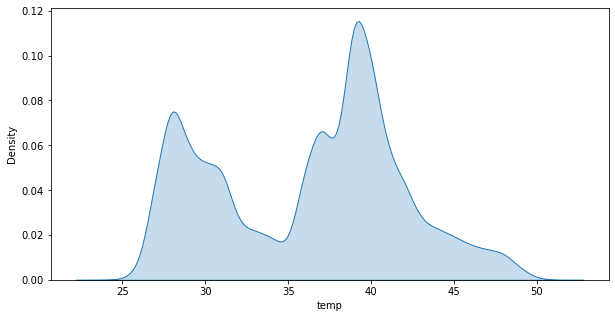

In [9]:
fig,ax=plt.subplots(1,figsize=(10,5))
sns.kdeplot(df.loc[df['out/in']=='Out','temp'],shade=True,ax=ax,label='outside temp')

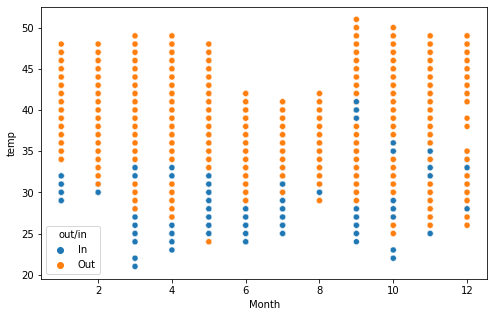

In [10]:
#Converção da coluna noted_date para o formato data e hora

df["noted_date"]=pd.to_datetime(df["noted_date"])

#Função que estrai os valores data
def features_build(df):
    df['Date'] = pd.to_datetime(df['noted_date'])
    df['Year'] = df['noted_date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    
features_build(df)
fig ,ax = plt.subplots(1,figsize=(8,5))
sns.scatterplot(x="Month", y="temp", hue="out/in", data=df,ax=ax)
plt.show()

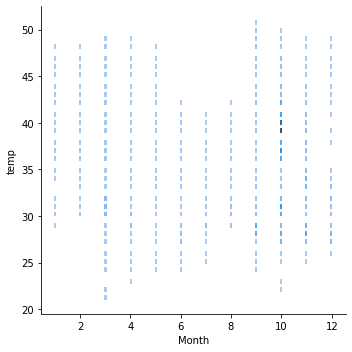

In [11]:
def features_build(df):
    df['Date'] = pd.to_datetime(df['noted_date'])
    df['Year'] = df['noted_date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    
features_build(df)

sns.displot(df, x="Month", y="temp");


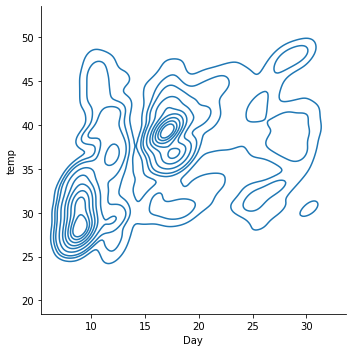

In [12]:
def features_build(df):
    df['Date'] = pd.to_datetime(df['noted_date'])
    df['Year'] = df['noted_date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    
features_build(df)

sns.displot(df, x="Day", y="temp", kind="kde");

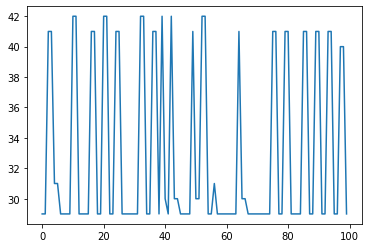

In [13]:
features_build(df)

value = df['temp'].head(100)

plt.plot(value)

In [16]:
df['temp'].agg(['mean']) #Média de temperatura

mean    35.053931
Name: temp, dtype: float64

In [17]:
df.groupby("out/in")["noted_date"].agg(["min","max"]) #Datas minimas e máximas.

,min,max
out/in,,
In,2018-01-11 00:06:00,2018-12-10 21:33:00
Out,2018-01-11 00:07:00,2018-12-10 23:55:00


## Referências:

MARTINS, Fellipe Silva (2021, September 1st). Curso Python.
Disponível em: https://github.com/fellipemartins/python_curso


Dataset disponível em: https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices

Imagen: Effects of Heat Index in our Body. Disponível em: https://caro.doh.gov.ph/effects-of-heat-index-in-our-body/

Seaborn data visualization library: https://seaborn.pydata.org/tutorial/distributions.html